In [15]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [2]:
wine_df = pd.read_csv("preprocessed_wine_data.csv", sep=",")
wine_df.head(20)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.10,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.20,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.60,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.50,0.041,24.0,160.0,0.99535,3.17,0.43,10.0,5
4,8.1,0.12,0.38,0.90,0.034,36.0,86.0,0.99026,2.80,0.55,12.0,6
5,6.6,0.20,0.38,7.90,0.052,30.0,145.0,0.99470,3.32,0.56,11.0,7
6,7.3,0.26,0.36,5.20,0.040,31.0,141.0,0.99310,3.16,0.59,11.0,6
7,6.9,0.32,0.17,7.60,0.042,69.0,219.0,0.99590,3.13,0.40,8.9,5
8,8.5,0.18,0.30,1.10,0.028,34.0,95.0,0.99272,2.83,0.36,10.0,4
9,7.2,0.27,0.28,15.20,0.046,6.0,41.0,0.99665,3.17,0.39,10.9,6


In [3]:
X = wine_df.copy()
X = X.drop("quality", axis=1)
y = wine_df["quality"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1497, 11)
(499, 11)
(1497,)
(499,)


In [4]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
clf = RandomForestClassifier(random_state=1, n_estimators=50).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6052104208416834


In [6]:
feature_importances = clf.feature_importances_

In [7]:
feature_importances

array([0.07505869, 0.09854902, 0.07647002, 0.08248523, 0.08540211,
       0.08755687, 0.09209268, 0.10919348, 0.09584174, 0.07816785,
       0.11918232])

In [8]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=50,
                                                 random_state=1))

In [10]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/rjarvis/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [12]:
print(X_selected_train_scaled.shape)
print(X_selected_test_scaled.shape)
print(y_train.shape)
print(y_test.shape)

(1497, 5)
(499, 5)
(1497,)
(499,)


In [11]:
clf2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf2.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf2.score(X_selected_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.6072144288577155


In [16]:
predictions = clf2.predict(X_selected_test_scaled)
cm = confusion_matrix(y_test, predictions)
display(cm)

array([[  1,   3,   1,   0,   0,   0],
       [  0,  90,  62,   3,   0,   0],
       [  0,  38, 165,  16,   1,   0],
       [  0,   1,  51,  46,   1,   0],
       [  0,   0,  14,   4,   1,   0],
       [  0,   0,   1,   0,   0,   0]])

/var/folders/rq/1_5hwcpj4mlb2h2j3lqyjwsh0000gp/T/ipykernel_54735/995591585.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xlabels)
/var/folders/rq/1_5hwcpj4mlb2h2j3lqyjwsh0000gp/T/ipykernel_54735/995591585.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels)


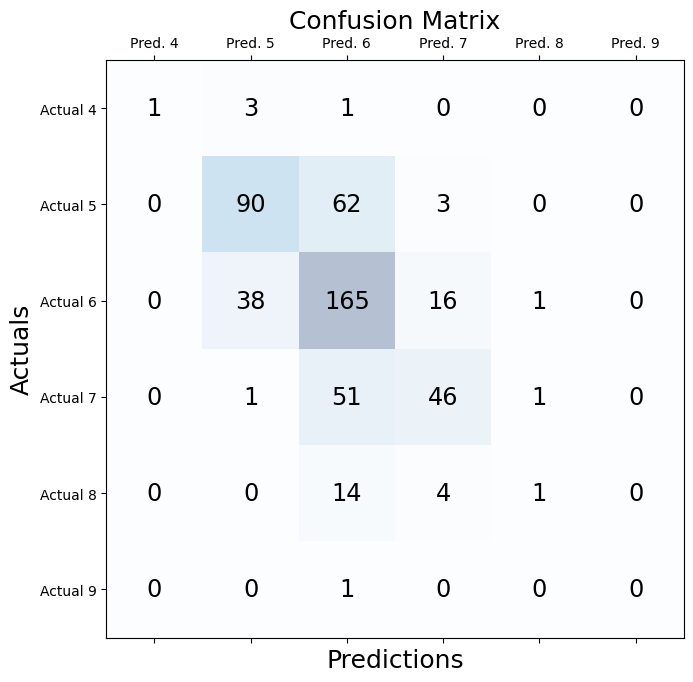

In [20]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
 

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
xlabels = ['Pred. 3','Pred. 4','Pred. 5','Pred. 6','Pred. 7','Pred. 8','Pred. 9']
ylabels = ['Actual 3', 'Actual 4', 'Actual 5', 'Actual 6', 'Actual 7', 'Actual 8', 'Actual 9']
ax.set_xticklabels(xlabels)
ax.set_yticklabels(ylabels)
plt.show()

In [22]:
print(f"Model acheived an accuracy score of {accuracy_score(y_test, predictions)}.")

Model acheived an accuracy score of 0.6072144288577155.
